In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
# checking directory

import os
print(os.getcwd())

C:\Users\pulkitmalhotra\AIML


In [156]:
# changing directory

os.chdir("/Users/pulkitmalhotra/AIML")
print(os.getcwd())

C:\Users\pulkitmalhotra\AIML


In [157]:
# Loading the dataset first

new_data=pd.read_csv("parkinsons.csv")
new_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [158]:
new_data.shape

(195, 24)

In [159]:
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy

new_data.groupby('status').count()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


In [160]:
# 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file,
# number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

new_data.info()

# 1 column of type object
# none of the columns have null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [161]:
new_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [162]:
new_data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [163]:
# 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as 
# central values, spread, tails etc. What are your observations?

In [164]:
# Univariate Analysis 

new_data.kurtosis(numeric_only  = True)

# Kurtosis with positive values indicates that those attributes have more data points around the tail

MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64

In [165]:
new_data.skew(numeric_only  = True)

# Skewness with positive values indicates data is skewed towards right. 
# Skewness with negative values indicates data is skewed towards left

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [166]:
# Average vocal fundamental frequency MDVP:Fo(Hz)

print("The average vocal fundamental frequency of a person is {:.2f} and 90% of the people have a Fo of {:.2f}".format(new_data['MDVP:Fo(Hz)'].mean(),new_data['MDVP:Fo(Hz)'].quantile(0.90)))

The average vocal fundamental frequency of a person is 154.23 and 90% of the people have a Fo of 209.89


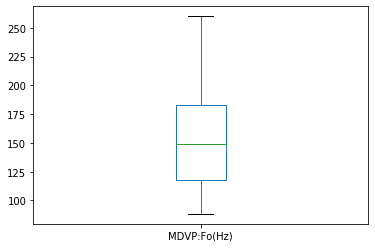

In [167]:
new_data['MDVP:Fo(Hz)'].plot(kind='box')

Skewness :  0.5917374636540784
Kurtosis :  -0.6278981066788805
AxesSubplot(0.125,0.125;0.775x0.755)


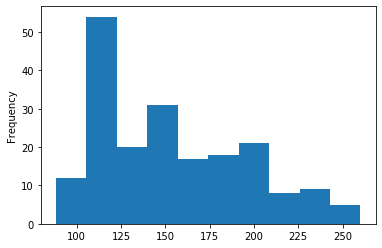

In [168]:
print('Skewness : ',new_data['MDVP:Fo(Hz)'].skew())
print('Kurtosis : ',new_data['MDVP:Fo(Hz)'].kurtosis())
print(new_data['MDVP:Fo(Hz)'].plot.hist())

# Skewness: The value is positive hence the data is skewed towards right side

# Kurtosis: The value is negative hence less data points are around the tail

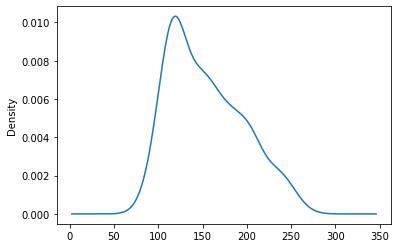

In [169]:
new_data['MDVP:Fo(Hz)'].plot.kde()


In [170]:
# Maximum vocal fundamental frequency MDVP:Fhi (Hz)

print("The maximum vocal fundamental frequency of a person is {:.2f} and 90% of the people have a Fhi of {:.2f}".format(new_data['MDVP:Fhi(Hz)'].mean(),new_data['MDVP:Fhi(Hz)'].quantile(0.90)))

The maximum vocal fundamental frequency of a person is 197.10 and 90% of the people have a Fhi of 261.00


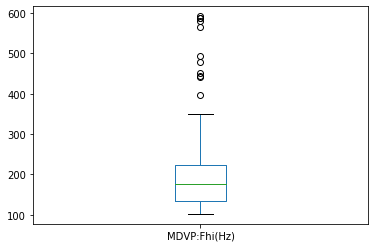

In [171]:
new_data['MDVP:Fhi(Hz)'].plot(kind='box')

Skewness :  2.542145997588398
Kurtosis :  7.627241211631889
AxesSubplot(0.125,0.125;0.775x0.755)


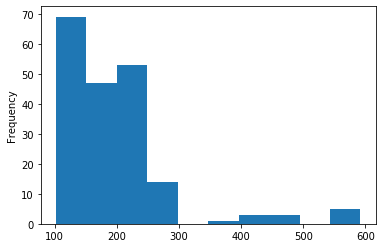

In [172]:
print('Skewness : ',new_data['MDVP:Fhi(Hz)'].skew())
print('Kurtosis : ',new_data['MDVP:Fhi(Hz)'].kurtosis())
print(new_data['MDVP:Fhi(Hz)'].plot.hist(bins=10))

# Skewness: The value is positive hence the data is skewed towards right side

# Kurtosis: The value is postive hence more data points are around the tail

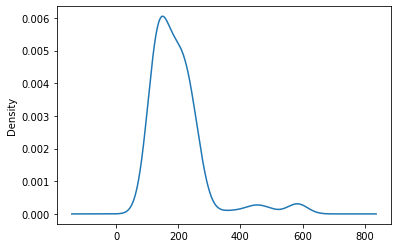

In [173]:
new_data['MDVP:Fhi(Hz)'].plot.kde()

In [174]:
# Outlier Treatment

q3 = new_data['MDVP:Fhi(Hz)'].quantile(0.75)
q1 = new_data['MDVP:Fhi(Hz)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 313.5485
outliers_below : 45.51950000000002


In [175]:
print("outliers_above: ", new_data['MDVP:Fhi(Hz)'].loc[new_data['MDVP:Fhi(Hz)']>outliers_above].count())
print("outliers_below: ", new_data['MDVP:Fhi(Hz)'].loc[new_data['MDVP:Fhi(Hz)']<outliers_below].count())
print('-----')
print(new_data['MDVP:Fhi(Hz)'].loc[new_data['MDVP:Fhi(Hz)']>outliers_above])

outliers_above:  12
outliers_below:  0
-----
16     349.259
73     588.518
102    586.567
115    492.892
116    442.557
117    450.247
118    442.824
120    479.697
149    565.740
186    592.030
187    581.289
193    396.961
Name: MDVP:Fhi(Hz), dtype: float64


In [176]:
# Finding the mean of all values less than equal to outliers_above
mean_val = new_data['MDVP:Fhi(Hz)'].loc[new_data['MDVP:Fhi(Hz)']<=outliers_above].mean()
new_data['MDVP:Fhi(Hz)'] = new_data['MDVP:Fhi(Hz)'].mask(new_data['MDVP:Fhi(Hz)']>outliers_above,mean_val)
print(new_data['MDVP:Fhi(Hz)'].head(20))

0     157.302000
1     148.650000
2     131.111000
3     137.871000
4     141.781000
5     131.162000
6     137.244000
7     113.840000
8     132.068000
9     120.103000
10    112.240000
11    115.871000
12    159.866000
13    179.139000
14    163.305000
15    217.455000
16    177.414634
17    232.181000
18    175.829000
19    189.398000
Name: MDVP:Fhi(Hz), dtype: float64


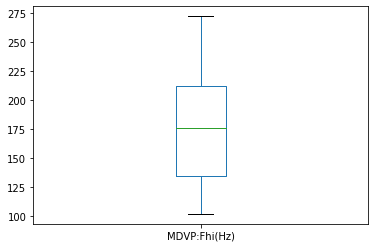

In [177]:
new_data['MDVP:Fhi(Hz)'].plot(kind='box')

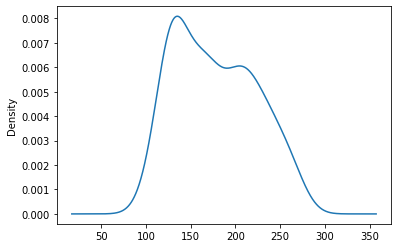

In [178]:
new_data['MDVP:Fhi(Hz)'].plot.kde()

Skewness :  0.2984561761401523
Kurtosis :  -1.0462818430124097


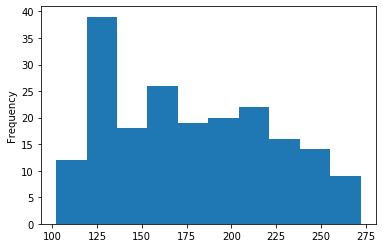

In [179]:
print('Skewness : ',new_data['MDVP:Fhi(Hz)'].skew())
print('Kurtosis : ',new_data['MDVP:Fhi(Hz)'].kurtosis())
new_data['MDVP:Fhi(Hz)'].plot.hist()

# After outlier treatment kurtosis indicates that less number of data points are around the tail

In [180]:
# Minimum vocal fundamental frequency MDVP:Flo (Hz)

print("The minimum vocal fundamental frequency of a person is {:.2f} and 90% of the people have a Flo of {:.2f}".format(new_data['MDVP:Flo(Hz)'].mean(),new_data['MDVP:Flo(Hz)'].quantile(0.90)))

The minimum vocal fundamental frequency of a person is 116.32 and 90% of the people have a Flo of 187.88


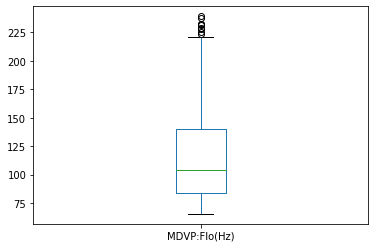

In [181]:
new_data['MDVP:Flo(Hz)'].plot(kind='box')

Skewness :  1.217350448627808
Kurtosis :  0.6546145211395396
AxesSubplot(0.125,0.125;0.775x0.755)


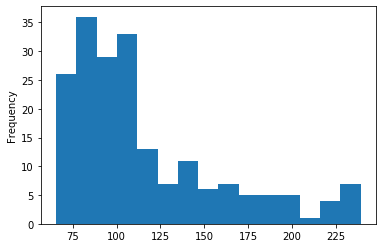

In [182]:
print('Skewness : ',new_data['MDVP:Flo(Hz)'].skew())
print('Kurtosis : ',new_data['MDVP:Flo(Hz)'].kurtosis())
print(new_data['MDVP:Flo(Hz)'].plot.hist(bins=15))

# Skewness: The value is positive hence the data is skewed towards right side

#Kurtosis: The value is postive hence the more data points are around the tail

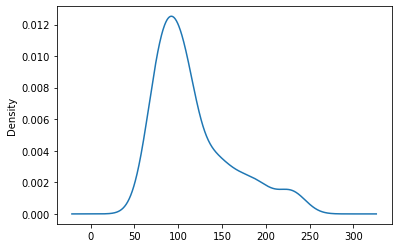

In [183]:
new_data['MDVP:Flo(Hz)'].plot.kde()

In [184]:
# Outlier Treatment

q3 = new_data['MDVP:Flo(Hz)'].quantile(0.75)
q1 = new_data['MDVP:Flo(Hz)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 195.74600000000004
outliers_below : 28.563499999999976


In [185]:
print(new_data['MDVP:Flo(Hz)'].loc[new_data['MDVP:Flo(Hz)']>outliers_above].count())
print(new_data['MDVP:Flo(Hz)'].loc[new_data['MDVP:Flo(Hz)']<outliers_below].count())
print('---')
print(new_data['MDVP:Flo(Hz)'].loc[new_data['MDVP:Flo(Hz)']>outliers_above])

15
0
---
33     197.079
34     196.160
42     225.227
43     232.483
44     232.435
45     227.911
46     231.848
62     205.495
63     223.634
64     221.156
111    199.020
166    229.256
167    237.303
169    219.783
170    239.170
Name: MDVP:Flo(Hz), dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


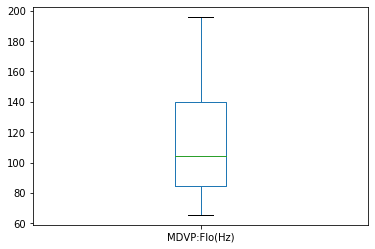

In [186]:
max_val = new_data['MDVP:Flo(Hz)'].loc[new_data['MDVP:Flo(Hz)']<=outliers_above].max()
new_data['MDVP:Flo(Hz)'] = new_data['MDVP:Flo(Hz)'].mask(new_data['MDVP:Flo(Hz)']>outliers_above,max_val)
print(new_data['MDVP:Flo(Hz)'].plot(kind='box'))

Skewness :  0.9105008789129816
Kurtosis :  -0.3380621656813876
AxesSubplot(0.125,0.125;0.775x0.755)


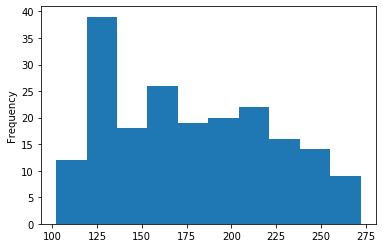

In [187]:
print('Skewness : ',new_data['MDVP:Flo(Hz)'].skew())
print('Kurtosis : ',new_data['MDVP:Flo(Hz)'].kurtosis())
print(new_data['MDVP:Fhi(Hz)'].plot.hist())

# After outlier treatment kurtosis indicates less number of data points around the tail

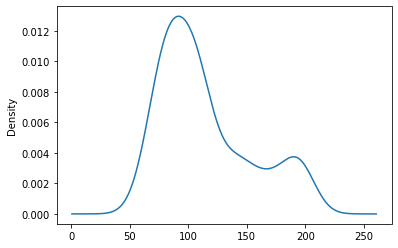

In [188]:
new_data['MDVP:Flo(Hz)'].plot.kde()

In [189]:
# MDVP:Jitter(%) 

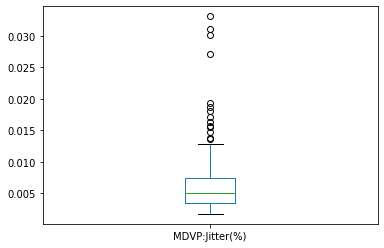

In [190]:
new_data['MDVP:Jitter(%)'].plot(kind='box')

In [191]:
print("The minimum vocal fundamental frequency of a person is {:.2f} and 90% of the people have a Jitter of {:.2f}".format(new_data['MDVP:Jitter(%)'].mean(),new_data['MDVP:Jitter(%)'].quantile(0.90)))

The minimum vocal fundamental frequency of a person is 0.01 and 90% of the people have a Jitter of 0.01


Skewness :  3.0849462014441817
Kurtosis :  12.030939276179508
AxesSubplot(0.125,0.125;0.775x0.755)


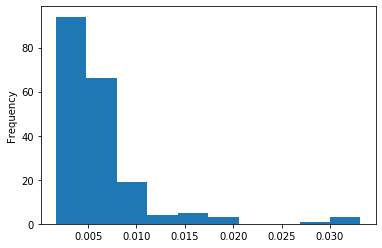

In [192]:
print('Skewness : ',new_data['MDVP:Jitter(%)'].skew())
print('Kurtosis : ',new_data['MDVP:Jitter(%)'].kurtosis())
print(new_data['MDVP:Jitter(%)'].plot.hist())


# Skewness: The value is positive hence the data is skewed towards right side

# Kurtosis: The value is positive hence more data points around the tail

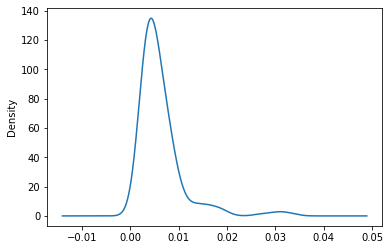

In [193]:
new_data['MDVP:Jitter(%)'].plot.kde()

In [194]:
# Outlier Treatment

q3 = new_data['MDVP:Jitter(%)'].quantile(0.75)
q1 = new_data['MDVP:Jitter(%)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.01127
outliers_below : -0.0004450000000000001


In [195]:
print(new_data['MDVP:Jitter(%)'].loc[new_data['MDVP:Jitter(%)']>outliers_above].count())
print(new_data['MDVP:Jitter(%)'].loc[new_data['MDVP:Jitter(%)']<outliers_below].count())
print('---')
print(new_data['MDVP:Jitter(%)'].loc[new_data['MDVP:Jitter(%)']>outliers_above])


16
0
---
4      0.01284
97     0.01280
98     0.01378
99     0.01936
100    0.03316
101    0.01551
102    0.03011
146    0.01568
147    0.01466
148    0.01719
149    0.01627
150    0.01872
151    0.03107
152    0.02714
157    0.01813
192    0.01360
Name: MDVP:Jitter(%), dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


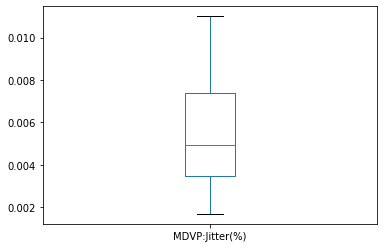

In [196]:
max_val = new_data['MDVP:Jitter(%)'].loc[new_data['MDVP:Jitter(%)']<=outliers_above].max()
new_data['MDVP:Jitter(%)'] = new_data['MDVP:Jitter(%)'].mask(new_data['MDVP:Jitter(%)']>outliers_above,max_val)
print(new_data['MDVP:Jitter(%)'].plot(kind='box'))

Skewness :  0.7135316854634219
Kurtosis :  -0.45799448113050856


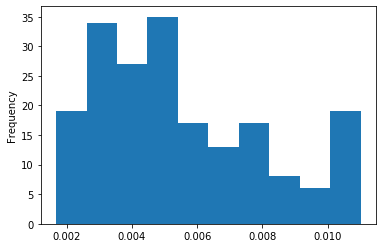

In [197]:
print('Skewness : ',new_data['MDVP:Jitter(%)'].skew())
print('Kurtosis : ',new_data['MDVP:Jitter(%)'].kurtosis())
new_data['MDVP:Jitter(%)'].plot.hist()

# After outlier treatment kurtosis indicates less number of data points around the tail

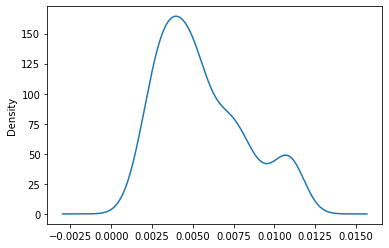

In [198]:
new_data['MDVP:Jitter(%)'].plot.kde()

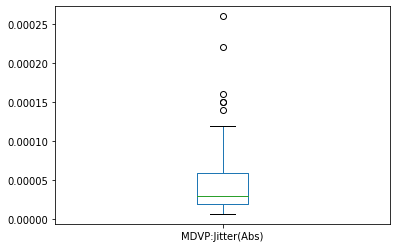

In [199]:
# MDVP:Jitter(Abs)

new_data['MDVP:Jitter(Abs)'].plot(kind='box')

Skewness :  2.6490714165257274
kurtosis :  10.869042517763667
AxesSubplot(0.125,0.125;0.775x0.755)


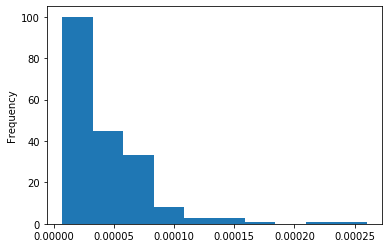

In [200]:
print('Skewness : ',new_data['MDVP:Jitter(Abs)'].skew())
print('kurtosis : ',new_data['MDVP:Jitter(Abs)'].kurtosis())
print(new_data['MDVP:Jitter(Abs)'].plot.hist())

# Skewness: The value is positive hence the data is skewed towards right side

# kurtosis: The value is positive hence more data points are around the tail

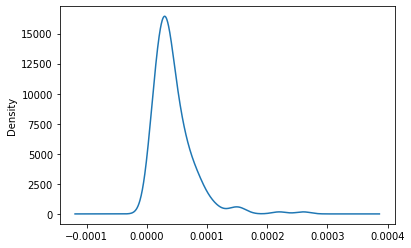

In [201]:
new_data['MDVP:Jitter(Abs)'].plot.kde()

In [202]:
# Outlier Treatment

q3 = new_data['MDVP:Jitter(Abs)'].quantile(0.75)
q1 = new_data['MDVP:Jitter(Abs)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 9.999999999999999e-05
outliers_below : -1.9999999999999995e-05


In [203]:
print(new_data['MDVP:Jitter(Abs)'].loc[new_data['MDVP:Jitter(Abs)']>outliers_above].count())
print(new_data['MDVP:Jitter(Abs)'].loc[new_data['MDVP:Jitter(Abs)']<outliers_below].count())

12
0


AxesSubplot(0.125,0.125;0.775x0.755)


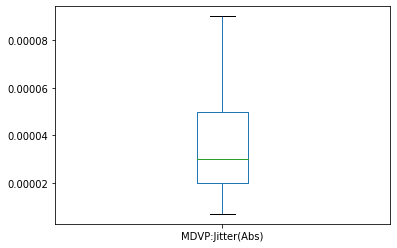

In [204]:
mean_val = new_data['MDVP:Jitter(Abs)'].loc[new_data['MDVP:Jitter(Abs)']<=outliers_above].mean()
new_data['MDVP:Jitter(Abs)'] = new_data['MDVP:Jitter(Abs)'].mask(new_data['MDVP:Jitter(Abs)']>outliers_above,mean_val)
print(new_data['MDVP:Jitter(Abs)'].plot(kind='box'))

skewness :  0.7300925097869511
Kurtosis :  0.008361144000160525


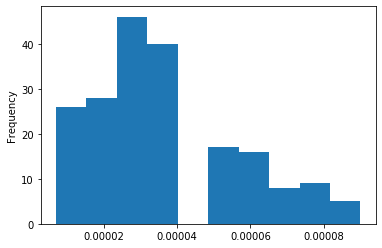

In [205]:
print('skewness : ',new_data['MDVP:Jitter(Abs)'].skew())
print('Kurtosis : ',new_data['MDVP:Jitter(Abs)'].kurtosis())
new_data['MDVP:Jitter(Abs)'].plot.hist()

# After outlier treatment kurtosis indicates less number of data points around the tail

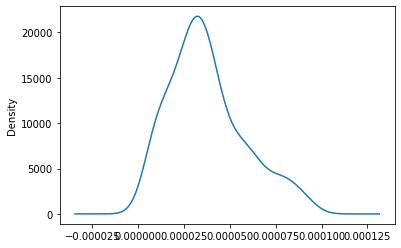

In [206]:
new_data['MDVP:Jitter(Abs)'].plot.kde()

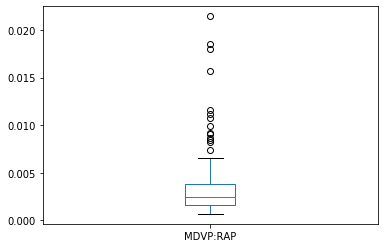

In [207]:
# MDVP:RAP

new_data['MDVP:RAP'].plot(kind='box')

Skewness :  3.360708450480554
Kurtosis :  14.213797721522418
AxesSubplot(0.125,0.125;0.775x0.755)


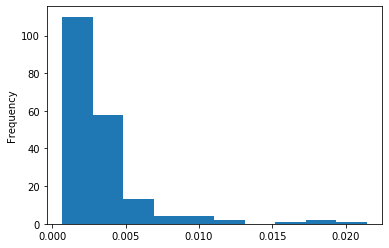

In [208]:
print('Skewness : ',new_data['MDVP:RAP'].skew())
print('Kurtosis : ',new_data['MDVP:RAP'].kurtosis())
print(new_data['MDVP:RAP'].plot.hist())

# Skewness: The value is positive hence the data is skewed towards right side

# Kurtosis: The value is positive hence more data points are around the tail

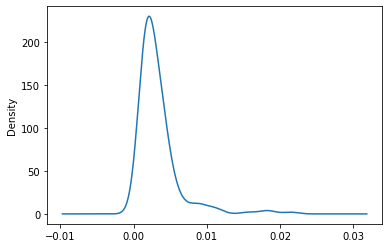

In [209]:
new_data['MDVP:RAP'].plot.kde()


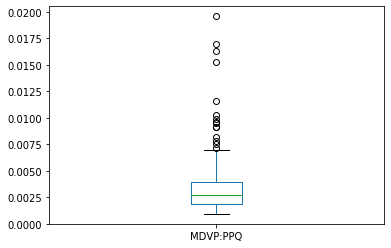

In [210]:
# MDVP:PPQ

new_data['MDVP:PPQ'].plot(kind='box')


Skewness :  3.073892457888517
Kurtosis :  11.963922120220282
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


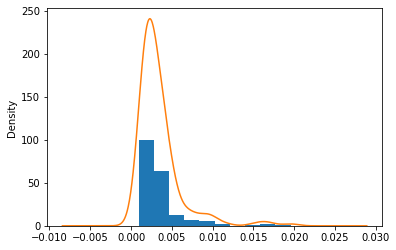

In [211]:
print('Skewness : ',new_data['MDVP:PPQ'].skew())
print('Kurtosis : ',new_data['MDVP:PPQ'].kurtosis())
print(new_data['MDVP:PPQ'].plot.hist())
print(new_data['MDVP:PPQ'].plot.kde())

# Skewness: The value is positive hence the data is skewed towards right side

# Kurtosis: The value is positive hence more data points are around the tail

In [212]:
# Outlier Treatment

q3 = new_data['MDVP:PPQ'].quantile(0.75)
q1 = new_data['MDVP:PPQ'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.00605
outliers_below : -0.00023499999999999997


In [213]:
print(new_data['MDVP:PPQ'].loc[new_data['MDVP:PPQ']>outliers_above].count())
print(new_data['MDVP:PPQ'].loc[new_data['MDVP:PPQ']<outliers_below].count())

19
0


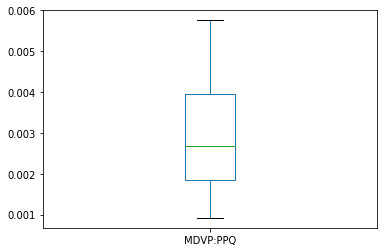

In [214]:
max_val = new_data['MDVP:PPQ'].loc[new_data['MDVP:PPQ']<=outliers_above].max()
new_data['MDVP:PPQ'] = new_data['MDVP:PPQ'].mask(new_data['MDVP:PPQ']>outliers_above,max_val)
new_data['MDVP:PPQ'].plot(kind='box')

Skewness :  0.6406137677940903
Kurtosis :  -0.6941626966478127
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


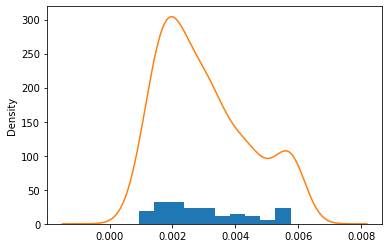

In [215]:
print('Skewness : ',new_data['MDVP:PPQ'].skew())
print('Kurtosis : ',new_data['MDVP:PPQ'].kurtosis())
print(new_data['MDVP:PPQ'].plot.hist())
print(new_data['MDVP:PPQ'].plot.kde())

# After outlier treatment kurtosis indicates less number of data points around the tail

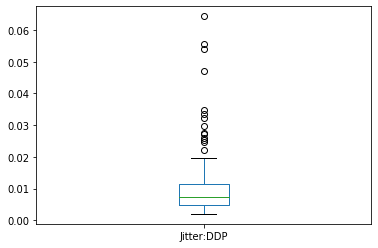

In [216]:
# Jitter:DDP

new_data['Jitter:DDP'].plot(kind='box')


Skewness :  3.3620584478857203
Kurtosis :  14.224761911379424
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


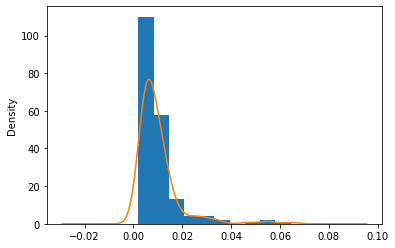

In [217]:
print('Skewness : ',new_data['Jitter:DDP'].skew())
print('Kurtosis : ',new_data['Jitter:DDP'].kurtosis())
print(new_data['Jitter:DDP'].plot.hist())
print(new_data['Jitter:DDP'].plot.kde())

# Skewness: The value is positive hence the data is skewed towards right side

# Kurtosis: The value is postive hence more data points are around the tail



In [218]:
# Outlier Treatment

q3 = new_data['Jitter:DDP'].quantile(0.75)
q1 = new_data['Jitter:DDP'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.018025
outliers_below : -0.001535


In [219]:
print(new_data['Jitter:DDP'].loc[new_data['Jitter:DDP']>outliers_above].count())
print(new_data['Jitter:DDP'].loc[new_data['Jitter:DDP']<outliers_below].count())

18
0


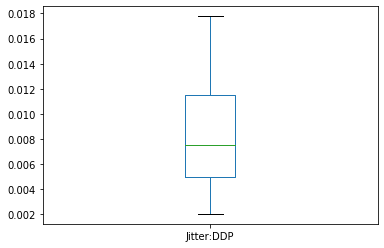

In [220]:
max_val = new_data['Jitter:DDP'].loc[new_data['Jitter:DDP']<=outliers_above].max()
new_data['Jitter:DDP'] = new_data['Jitter:DDP'].mask(new_data['Jitter:DDP']>outliers_above,max_val)
new_data['Jitter:DDP'].plot(kind='box')

Skewness :  0.7360596525004133
Kurtosis :  -0.5082945859294927
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


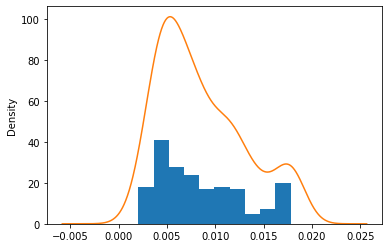

In [221]:
print('Skewness : ',new_data['Jitter:DDP'].skew())
print('Kurtosis : ',new_data['Jitter:DDP'].kurtosis())
print(new_data['Jitter:DDP'].plot.hist())
print(new_data['Jitter:DDP'].plot.kde())

# After outlier treatment kurtosis indicates less number of data points around the tail

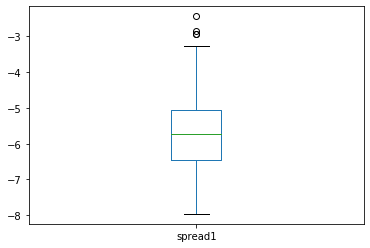

In [222]:
# Spread1

new_data['spread1'].plot(kind='box')


Skewness :  0.4321389320131796
Kurtosis :  -0.05019918161280801
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


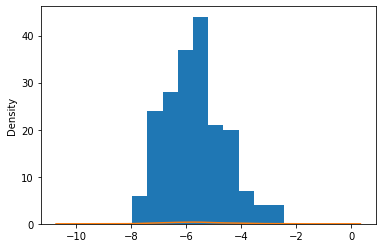

In [223]:
print('Skewness : ',new_data['spread1'].skew())
print('Kurtosis : ',new_data['spread1'].kurtosis())
print(new_data['spread1'].plot.hist())
print(new_data['spread1'].plot.kde())


# Skewness: Rightly

# Kurtosis: less number of data points around the tail

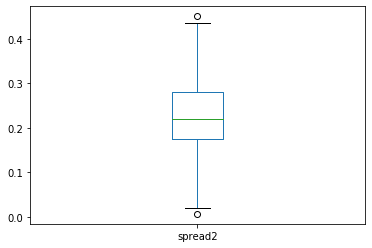

In [224]:
# Spread2

new_data['spread2'].plot(kind='box')


Skewness :  0.14443048549278412
Kurtosis :  -0.08302289327680024
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


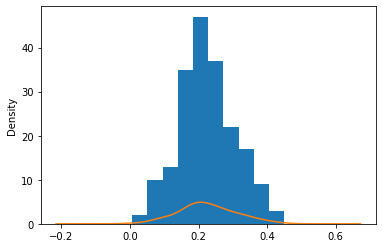

In [225]:
print('Skewness : ',new_data['spread2'].skew())
print('Kurtosis : ',new_data['spread2'].kurtosis())
print(new_data['spread2'].plot.hist())
print(new_data['spread2'].plot.kde())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


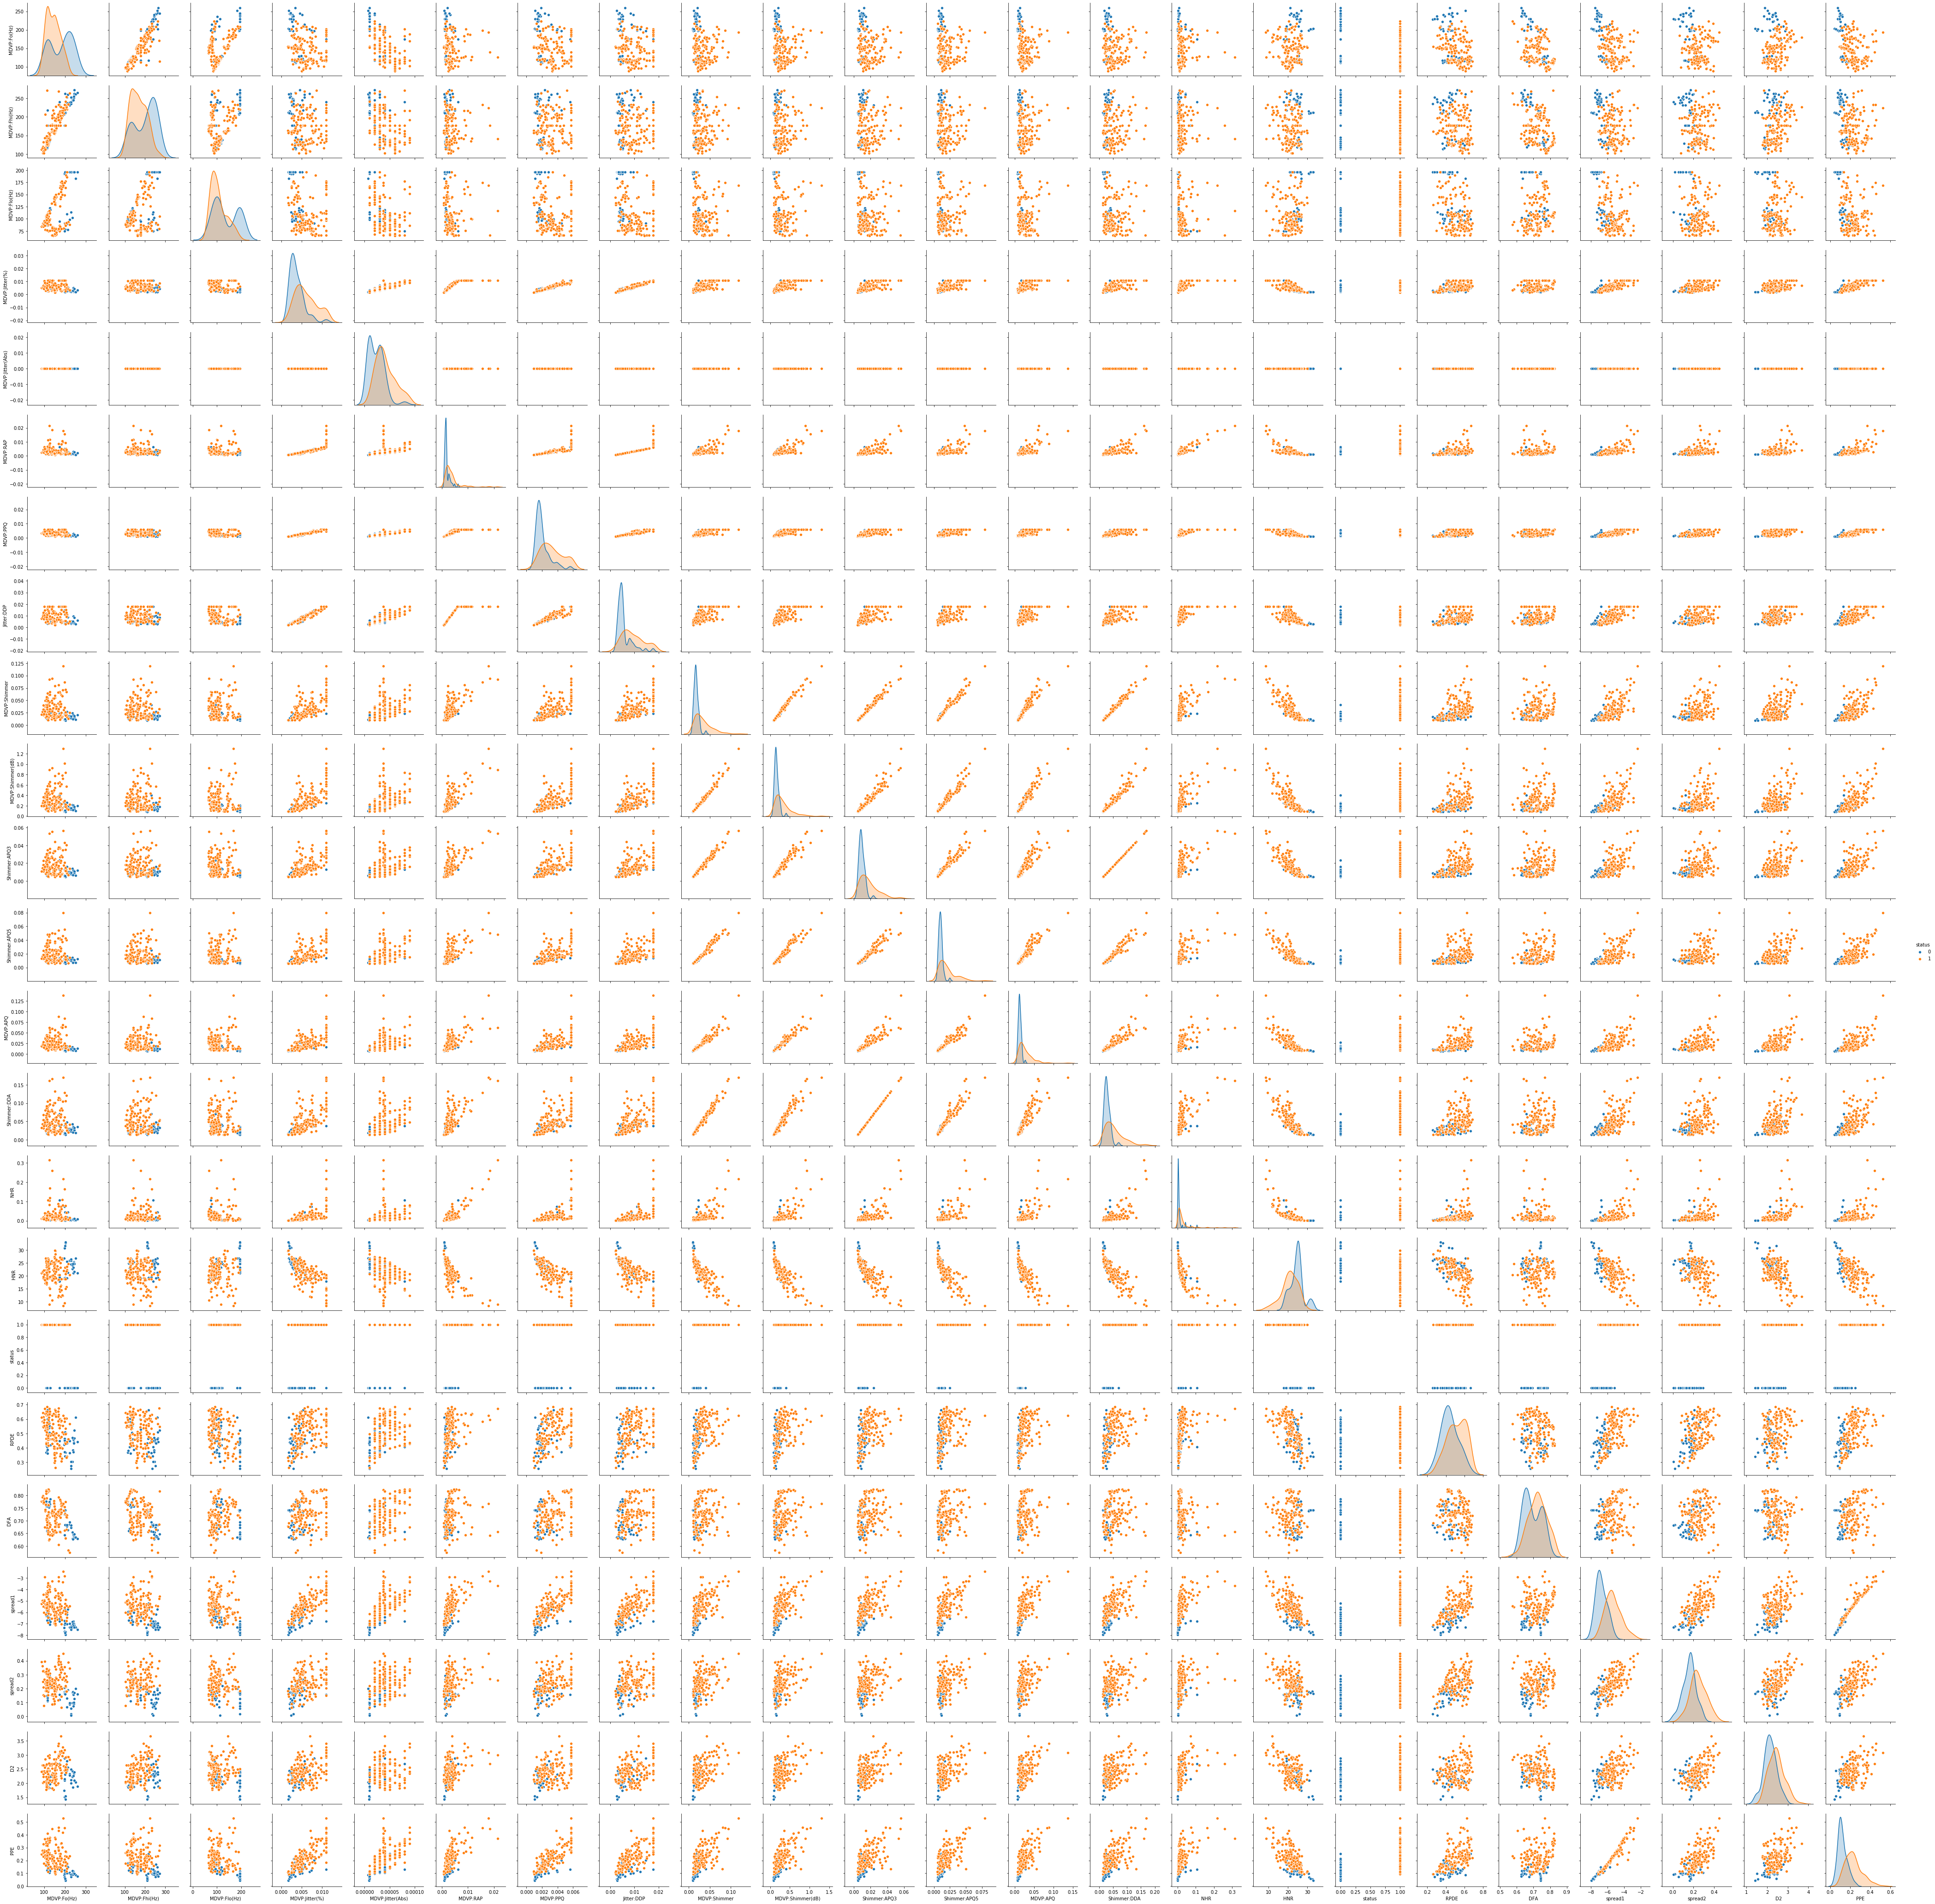

In [226]:
# Bivariate Analysis

sns.pairplot(new_data, hue = "status",diag_kind="kde")


In [227]:
new_data.corr()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.880982,0.561371,-0.250583,-0.547372,-0.076194,-0.273418,-0.172984,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.880982,1.000000,0.377400,-0.142345,-0.407343,-0.030363,-0.143871,-0.085929,-0.037342,-0.012917,...,-0.037383,0.024090,-0.041859,-0.312888,-0.231960,-0.439904,-0.283326,-0.159403,0.230478,-0.241527
MDVP:Flo(Hz),0.561371,0.377400,1.000000,-0.323256,-0.431424,-0.086361,-0.300313,-0.270064,-0.126839,-0.100045,...,-0.137664,-0.098493,0.214699,-0.338143,-0.402776,0.009791,-0.372640,-0.207804,-0.089108,-0.317729
MDVP:Jitter(%),-0.250583,-0.142345,-0.323256,1.000000,0.764780,0.803458,0.972213,0.974055,0.680992,0.697224,...,0.660841,0.635809,-0.725859,0.374562,0.425158,0.217313,0.758064,0.423388,0.412113,0.769584
MDVP:Jitter(Abs),-0.547372,-0.407343,-0.431424,0.764780,1.000000,0.410835,0.774249,0.709354,0.427913,0.430953,...,0.402661,0.225299,-0.456776,0.395158,0.420964,0.408744,0.660562,0.407151,0.179888,0.659667
MDVP:RAP,-0.076194,-0.030363,-0.086361,0.803458,0.410835,1.000000,0.769777,0.813181,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.273418,-0.143871,-0.300313,0.972213,0.774249,0.769777,1.000000,0.949279,0.688001,0.699980,...,0.667111,0.596246,-0.738289,0.386393,0.430089,0.300069,0.774455,0.415703,0.374005,0.802770
Jitter:DDP,-0.172984,-0.085929,-0.270064,0.974055,0.709354,0.813181,0.949279,1.000000,0.673003,0.686114,...,0.661542,0.633190,-0.733476,0.361899,0.391978,0.182481,0.694455,0.326094,0.413472,0.700634
MDVP:Shimmer,-0.098374,-0.037342,-0.126839,0.680992,0.427913,0.759581,0.688001,0.673003,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,-0.012917,-0.100045,0.697224,0.430953,0.790652,0.699980,0.686114,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [228]:
# After outlier Treatment

new_data.kurtosis(numeric_only  = True)


MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)        -1.046282
MDVP:Flo(Hz)        -0.338062
MDVP:Jitter(%)      -0.457994
MDVP:Jitter(Abs)     0.008361
MDVP:RAP            14.213798
MDVP:PPQ            -0.694163
Jitter:DDP          -0.508295
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64

In [229]:
new_data.skew(numeric_only  = True)


MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        0.298456
MDVP:Flo(Hz)        0.910501
MDVP:Jitter(%)      0.713532
MDVP:Jitter(Abs)    0.730093
MDVP:RAP            3.360708
MDVP:PPQ            0.640614
Jitter:DDP          0.736060
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [230]:
# Storing the Processed Data into a CSV file

new_data.to_csv('cleaned-data.csv')

In [231]:
# 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

import pandas as pd
from sklearn import metrics

cleaned_data = pd.read_csv('cleaned-data.csv')
cleaned_data.head()


,Unnamed: 0,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00576,0.01394,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00576,0.01633,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00576,0.01505,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,phon_R01_S01_5,116.014,141.781,110.655,0.01101,0.000037,0.00655,0.00576,0.01778,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [232]:
# capture the target column ("status") into separate vectors for training set and test set

X = cleaned_data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']]

y = cleaned_data["status"]


In [233]:
# splitting data into training and test set for independent attributes

from sklearn.model_selection import train_test_split

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

print(train_set.shape)
print(test_set.shape)
print(train_labels.shape)
print(test_labels.shape)

(136, 22)
(59, 22)
(136,)
(59,)


In [234]:
# 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. 

# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [235]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [238]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Parkinson_File = open('parkinson.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Parkinson_File, feature_names = list(train_set))

Parkinson_File.close()

system("dot -Tpng parkinson.dot -o parkinson.png")
#Image("parkinson.png")

1

In [239]:
# Testing the model on test data

y_predict = dt_model.predict(test_set)


In [240]:
print(dt_model.score(train_set , train_labels))
print(dt_model.score(test_set , test_labels))

1.0
0.9152542372881356


In [241]:
# 6. Capturing the predicted values and displaying it in a crosstab

print(metrics.confusion_matrix(test_labels, y_predict))


[[16  3]
 [ 2 38]]


In [260]:
# 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. 

reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15, min_samples_leaf =1)
reg_dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [261]:
Parkinson_File_reg = open('parkinson_reg.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file=Parkinson_File_reg, feature_names = list(train_set))

Parkinson_File_reg.close()

system("dot -Tpng parkinson_reg.dot -o parkinson_reg.png")


1

In [262]:
y_predict = reg_dt_model.predict(test_set)


In [263]:

print(reg_dt_model.score(train_set , train_labels))
print(reg_dt_model.score(test_set , test_labels))

1.0
0.847457627118644


In [257]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[15  4]
 [ 2 38]]


In [ ]:
# Conclusion
# In this particular case the model accuracy decreased after regularizing

# Regularization, significantly reduces the variance of the model, without substantial increase in its bias.
# As the value of λ rises, it reduces the value of coefficients and thus reducing the variance.
# Regularization is a technique used for tuning the function by adding an additional penalty term in the error function. 
# The additional term controls the excessively fluctuating function such that the coefficients don't take extreme values.

In [258]:
# 8.  Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? 

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(train_set, train_labels)

In [259]:
y_predict = rfcl.predict(test_set)
print(rfcl.score(test_set , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.8305084745762712
[[10  9]
 [ 1 39]]
